In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [69]:
# load data
df = pd.read_csv('tap_fun_train.csv')
df.head(5)

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


# User Categorization using KMeans Clustering

In [70]:
# define active user from the data frame
active_user = df[(df['avg_online_minutes'] >=30)]
active_user_group = active_user[['bd_stronghold_level', 'pvp_battle_count', 'pve_battle_count', 'avg_online_minutes','pay_count', 'pay_price']]
active_user_group

,bd_stronghold_level,pvp_battle_count,pve_battle_count,avg_online_minutes,pay_count,pay_price
25,0,0,0,44.666667,1,0.99
40,0,1,6,199.333333,3,2.97
47,0,0,0,109.333333,3,12.97
67,0,0,0,43.333333,0,0.00
69,0,0,0,73.500000,0,0.00
...,...,...,...,...,...,...
2287953,9,10,31,46.666667,0,0.00
2287960,9,9,77,185.666667,1,0.99
2287964,8,10,6,34.166667,0,0.00
2287970,9,13,18,62.000000,1,0.99


In [71]:
#define num of clusters(k)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(active_user_group)

#centroids and labelsm
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

cluster_data = {'Type 1' : centroids[0],
               'Type 2' : centroids[1],
               'Type 3' : centroids[2]}
active_user_group = pd.DataFrame(cluster_data, index=['bd_stronghold_level', 'pvp_battle_count', 'pve_battle_count', 'avg_online_minutes','pay_count', 'pay_price'])

active_user_group

,Type 1,Type 2,Type 3
bd_stronghold_level,6.703388,9.770331,17.255034
pvp_battle_count,15.122164,59.788503,105.697987
pve_battle_count,26.767096,90.003477,96.369128
avg_online_minutes,79.051218,349.539484,445.095078
pay_count,0.479798,2.875379,41.409396
pay_price,2.330076,31.566367,2202.525503


In [84]:
# find count of each label/type
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({0: 125086, 1: 17830, 2: 149})


In [180]:
revenue = active_user['pay_price'].sum()
revenue_pct = {'Fish' : [125086*2.330076, round(125086*2.330076/revenue, 2)],
              'Dolphin' : [17830*31.566367, round(17830*31.566367/revenue, 2)],
              'Whale' : [149*2202.525503, round(149*2202.525503/revenue, 2)]}
revenue = pd.DataFrame(revenue_pct)
revenue = revenue.rename(index = {0 : 'Revenue',
                                 1: '% Total Revenue'})
revenue

,Fish,Dolphin,Whale
Revenue,291459.886536,562828.32361,328176.299947
% Total Revenue,0.250000,0.48000,0.280000


In [181]:
revenue.iloc[1, :]

Fish       0.25
Dolphin    0.48
Whale      0.28
Name: % Total Revenue, dtype: float64

<BarContainer object of 3 artists>

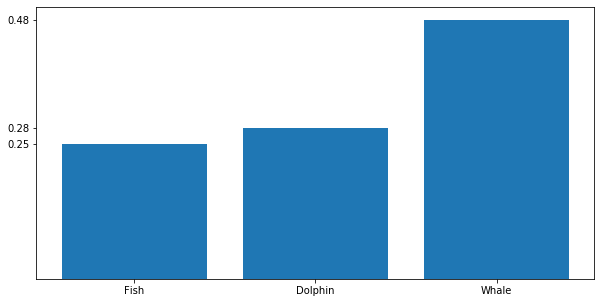

In [197]:
fig, ax = plt.subplots(figsize = (10, 5))
x = revenue.columns
y = sorted(revenue.iloc[1, :])

ax.set_yticks(y)

ax.bar(x, y)

## Insight
### By using KMeans clustering, we discovered 3 types of users: 
     
    1. Type 1 - Fish: least spending group of users, total sample size 125086, average spend at 2.3, average level 6.7 and avg online minutes at 79 minutes. Total fish revenue accounts for 25% of total revenue.

    2. Type 2 - Dolphin: moderate spending group of users, total sample size 17830, average spend at 31, average level 9.7 and avg online minutes at 349.5 minutes. Dolphin takes account for 28% of total revenue.

    3. Type 3 - Whale: moderate spending group of users, total sample size 149, average spend at astonishing number of 2202.5 , average level 17 and avg online minutes at 445 minutes. Takes account for 48% of total revenue.
    
### Conlusion: 
    
    Even though some may argue we should leverage long tail effect, which means bring more revenue from Fish users, I personally believe we should prioritze Whale and Dolphin user first. Only focus on Fish users when we saturated the other 2 groups in terms of revenue. 
    
    In addtion, this categorization will allow more targeted marketing and in-game notification, in result imporve total user activity. 

